In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [76]:
movies = pd.read_csv("movies_metadata.csv")
location = pd.read_csv("production_location.csv")
ratings = pd.read_csv("ratings.csv")
users_pass = pd.read_csv("users+password.csv")

In [188]:
# create the column Year in movies dataframe
movies['Year'] = df['release_date'].str[:-6]
movies.head()

,budget,homepage,id,original_language,release_date,revenue,runtime,title,genre,Year
0,30000000.0,http://toystory.disney.com/toy-story,862.0,en,10/30/1995,373554033.0,81.0,Toy Story,Adventure,1995
1,65000000.0,NaN,8844.0,en,12/15/1995,262797249.0,104.0,Jumanji,Thriller,1995
2,16000000.0,NaN,31357.0,en,12/22/1995,81452156.0,127.0,Waiting to Exhale,Horror,1995
3,60000000.0,NaN,949.0,en,12/15/1995,187436818.0,170.0,Heat,Sci-Fi,1995
4,35000000.0,NaN,9091.0,en,12/22/1995,64350171.0,106.0,Sudden Death,Documentary,1995


In [189]:
# group the movies titles by rating and find the mean and count
average_ratings = pd.DataFrame(ratings.groupby('title')['Rating'].agg(['mean', 'count']))
average_ratings.head()

,mean,count
title,,
10 Things I Hate About You,2.6,1
101 Dalmatians,2.9,1
12 Angry Men,1.1,1
"20,000 Leagues Under the Sea",6.3,1
200 Cigarettes,7.5,1


In [193]:
sorted_ratings = average_ratings.sort_values(ascending=False, by = "mean")
top_10_ratings = sorted_ratings.head(10)
top_10_ratings

,mean,count
title,,
Kama Sutra - A Tale of Love,10.0,1
Robin Hood: Men in Tights,10.0,1
Madonna: Truth or Dare,10.0,1
Anna Karenina,10.0,1
I Love Trouble,10.0,1
It Came from Hollywood,10.0,1
Lethal Weapon 3,10.0,1
Peeping Tom,10.0,1
Laura,9.9,1


# Bar graph of Top Movie Ratings

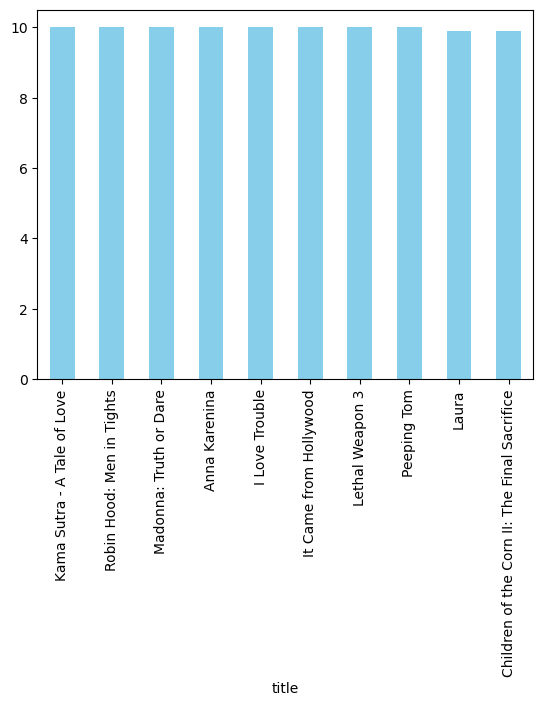

In [194]:
top_10_ratings['mean'].plot(kind='bar', color='skyblue');

In [172]:
# merge the movies and ratings data
merged_df = pd.merge(movies, ratings, left_on='id', right_on='Movie_id', how='inner')
merged_df.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1203: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


,budget,homepage,id,original_language,release_date,revenue,runtime,title_x,genre,Year,Rating_id,Rating,Movie_id,title_y,Username,Critique,Date
0,30000000.0,http://toystory.disney.com/toy-story,862.0,en,10/30/1995,373554033.0,81.0,Toy Story,Adventure,1995,1,4.8,862,Toy Story,asolan0,"Bypass Jejunum to Ascending Colon, Open Approach",2015-02-10
1,65000000.0,NaN,8844.0,en,12/15/1995,262797249.0,104.0,Jumanji,Thriller,1995,2,7.5,8844,Jumanji,nscryne1,"Insert of Infusion Dev into L Foot Vein, Perc ...",2009-08-06
2,16000000.0,NaN,31357.0,en,12/22/1995,81452156.0,127.0,Waiting to Exhale,Horror,1995,3,2.0,31357,Waiting to Exhale,eainscow2,"Bypass Cereb Vent to Nasophar with Nonaut Sub,...",2014-11-13
3,60000000.0,NaN,949.0,en,12/15/1995,187436818.0,170.0,Heat,Sci-Fi,1995,4,6.4,949,Heat,ckinder3,"Insertion of Radioactive Element into Face, Pe...",2016-07-08
4,35000000.0,NaN,9091.0,en,12/22/1995,64350171.0,106.0,Sudden Death,Documentary,1995,5,5.1,9091,Sudden Death,owolfenden4,"Restrict of R Popl Art with Intralum Dev, Perc...",2010-10-18


In [173]:
# group by year and get the mean rating and count of movies each year
average_ratings_year = pd.DataFrame(merged_df.groupby('Year')['Rating'].agg(['mean', 'count']))
average_ratings_year = average_ratings_year.reset_index()
average_ratings_year.head()

,Year,mean,count
0,1927,4.200000,1
1,1929,7.700000,1
2,1931,5.300000,3
3,1932,3.650000,2
4,1933,5.133333,3


# Line Chart of Averate Rating Each Year

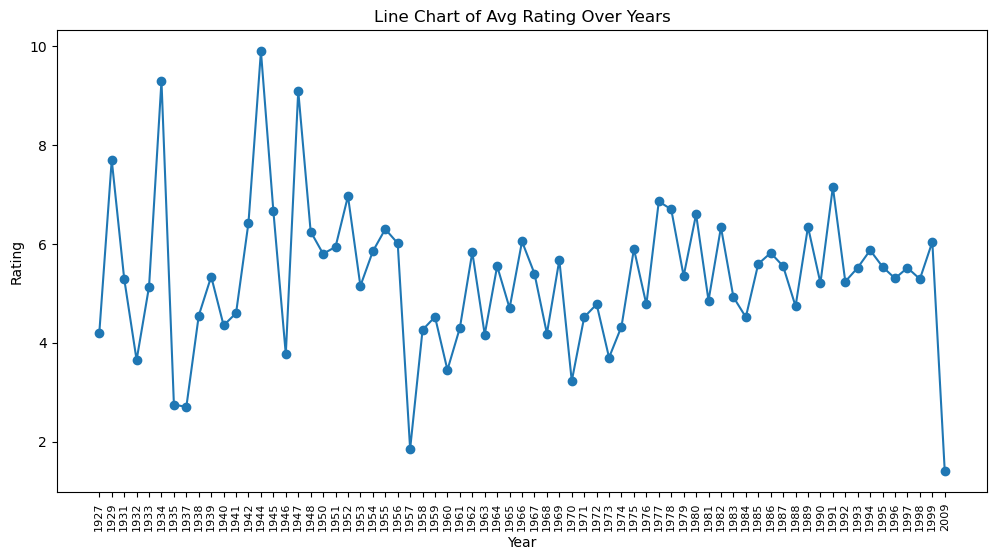

In [174]:
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_year['Year'], average_ratings_year['mean'], marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Line Chart of Avg Rating Over Years')
plt.xticks(rotation=90, fontsize=8)
plt.show()


# Line Chart of Average Rating Per Genre Each Year

In [181]:
def plot_average_ratings_per_year(genre):

    desired_genre = genre
    genre_data = merged_df[merged_df['genre'] == desired_genre]
    average_ratings_per_year = genre_data.groupby('Year')['Rating'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(average_ratings_per_year['Year'], average_ratings_per_year['Rating'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.title(f'Average Ratings for {desired_genre} Genre Over Years')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

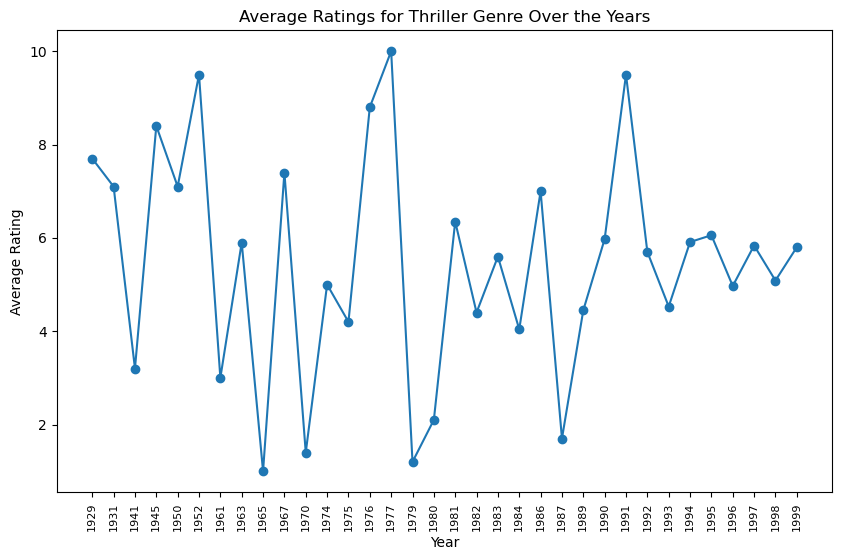

In [182]:
# choose from 'Adventure', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'Drama', 'Action', 'Comedy'
plot_average_ratings_per_year('Thriller')

# Bar Chart of Count of Movies Each Year

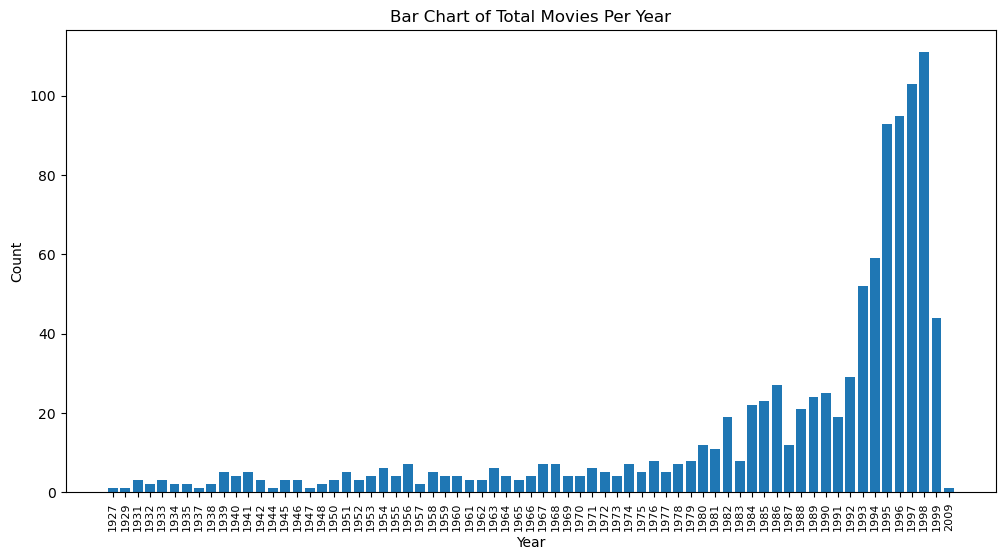

In [183]:
plt.figure(figsize=(12, 6))
plt.bar(average_ratings_year['Year'], average_ratings_year['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Chart of Total Movies Per Year')
plt.xticks(rotation=90, fontsize=8)
plt.show()


In [184]:
# group by each genre and find the mean
average_ratings_genre = pd.DataFrame(merged_df.groupby('genre')['Rating'].agg(['mean', 'count']))
average_ratings_genre = average_ratings_genre.reset_index()
average_ratings_genre

,genre,mean,count
0,Action,5.433058,121
1,Adventure,5.504895,143
2,Comedy,5.753731,134
3,Documentary,5.658678,121
4,Drama,5.019298,114
5,Horror,5.526119,134
6,Sci-Fi,5.386441,118
7,Thriller,5.431034,116


# Bar Graph of Average Rating Per Genre

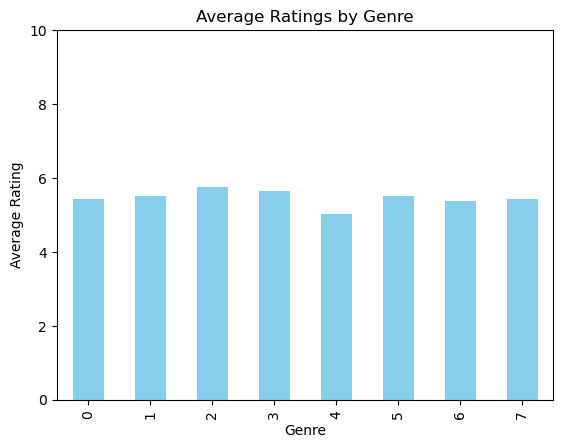

In [185]:
ax = average_ratings_genre['mean'].plot(kind='bar', color='skyblue');
plt.ylim(0, 10)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.show()

# Histogram of Movie RunTimes

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


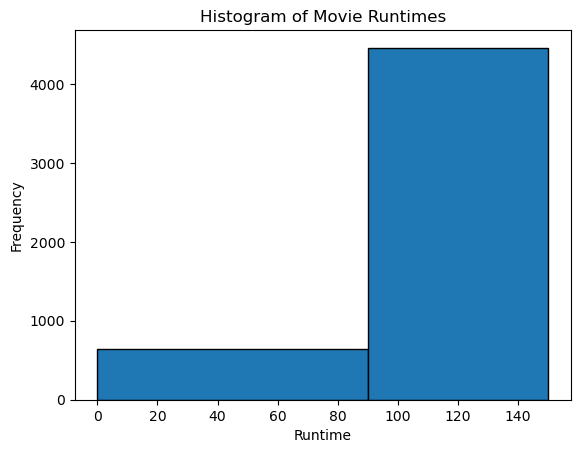

,Bin Ranges,Bin Counts
0,"(0.0, 90.0)",646.0
1,"(90.0, 150.0)",4458.0
2,"(150.0, inf)",276.0


In [186]:
movies_runtime = movies['runtime'].dropna()

hist_values, bin_edges, _ = plt.hist(movies_runtime, bins=[0, 90, 150, float('inf')], edgecolor='black')

bin_edges = [round(edge, 2) for edge in bin_edges]
bin_ranges = [(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges)-1)]

hist_df = pd.DataFrame({'Bin Ranges': bin_ranges, 'Bin Counts': hist_values})

plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Runtimes')
plt.show()

display(hist_df)

# Pie Chart of Movie RunTimes

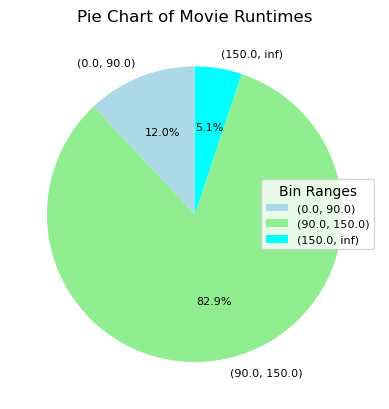

In [187]:
colors = ['lightblue', 'lightgreen', 'cyan']
plt.pie(hist_df['Bin Counts'], labels=hist_df['Bin Ranges'], autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 8})

plt.title('Pie Chart of Movie Runtimes')
plt.legend(hist_df['Bin Ranges'], title='Bin Ranges', loc='right', bbox_to_anchor=(1, 0.5), prop={'size': 8})
plt.show()

# Pie Chart of Movie Language

In [195]:
# only top 3
lang_count = movies['original_language'].value_counts()
lang_count = lang_count.head(3)

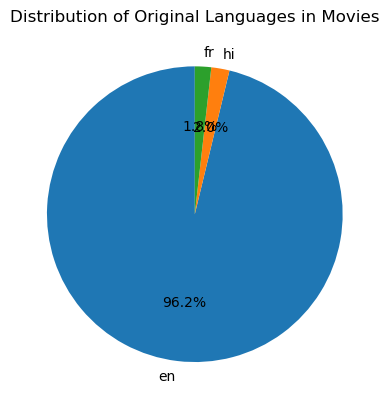

In [148]:
plt.pie(lang_count, labels=lang_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Original Languages in Movies')
plt.show()

# Pie Chart of Movie Genres

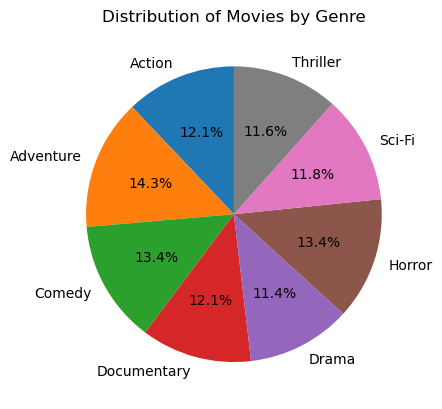

In [156]:
plt.pie(average_ratings_genre['count'], labels=average_ratings_genre['genre'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies by Genre')
plt.show()